# Preâmbulo

Operações Geometricas são aquelas que operam sobrea as relações geometricas da imagem, as mais conhecidas são rotação, translação, escala, e algumas outras, lembrando que essas trasnformações modificam apenas a geometria dos pixels da imagem.

Para conseguir desentortar a imagem primeiro devemos descobrir qual a transformação linear levou a folha de papel branca quadrada ao formatado a qual ela está na foto, essa tranformação pode ser calculado utilizando o método dos minimos quadrados.

Com a função de trasnformação descoberta, agora descobrir a intensidade de cada pixel da imagem para isso devemos para cada pixels da imagem "desentordada" descobrir qual é o seu valor na imagem original, como esses valores muitas vezes não sçao numeros inteiros, logo não estão realmente presentes na imagem discreta na memoria utilizaremos uma interpolação bilinear para calcular seu valor aproximado.

# Código

In [10]:
from numpy.linalg import inv
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib as mpl
from math import ceil, floor

In [2]:
def find_transform(original,transformada):
    [lin,col] = transformada.shape
    transformada_visivel = [transformada[0,:], transformada[1,:]]
    L = np.reshape(transformada_visivel,col*(lin-1),1)
    A = np.zeros((8, col*2)).astype(int)
    for i in range(col):
        x = original[0,i]
        y = original[1,i]
        x_ = transformada[0,i]
        y_ = transformada[1,i]
        A[2*i,:] = [x,y,1,0,0,0,-x*x_,-y*x_]
        A[2*i+1,:] = [0,0,0,x,y,1,-x*y_,-y*y_]
    x = inv(A.transpose().dot(A)).dot(A.transpose()).dot(L)
    x = np.append(x, 1)
    sizeT = (col*lin+1)/3
    T = x.reshape(3,3)
    return T

In [3]:
def apply_transform(m,T):
    [lin,col] = m.shape
    nova_matriz = np.zeros((lin,col))
    mat = T.dot(m)
    for i in range(col):
        linha = mat[:,i]
        dim = linha[2]
        if dim !=1:
            fac = 1/dim
            linha = linha * fac
        nova_matriz[:,i] = linha      
    return nova_matriz

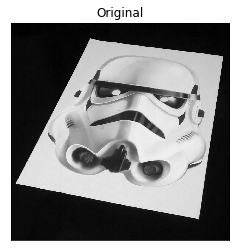

In [4]:
imgname = 'IMG_20170615_082455.jpg'

img = cv2.imread(imgname,0)
plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.show()

In [55]:
SIZE = 1500
original = np.array([[226, 1301, 1070, 112], [1410, 1228, 30, 530],[1, 1, 1, 1]])
transformada = np.array([[1, SIZE, SIZE, 1], [1, 1, SIZE, SIZE], [1, 1, 1, 1]]) 

In [56]:
transformation = inv(find_transform(original,transformada))

In [57]:
bilinear = np.zeros((SIZE,SIZE))

In [58]:
for i in range(SIZE):
    for j in range(SIZE):
        ponto = np.array([i, j, 1]).reshape(3,1)
        novo_ponto = apply_transform(ponto, transformation).reshape(3)
        
        x = novo_ponto[0]
        y = novo_ponto[1]
        
        x1 = floor(x)
        x2 = ceil(x)
        y1 = floor(y)
        y2 = ceil(y)
        
        q11 = (x1,y1)
        q21 = (x2,y1)
        q12 = (x1,y2)
        q22 = (x2,y2)
        
        w1 = img[q11] * (abs(x-x2))* (abs(y-y2))
        w2 = img[q12] * (abs(x-x2))* (abs(y-y1))
        w3 = img[q22] * (abs(x-x1))* (abs(y-y1))
        w4 = img[q21] * (abs(x-x1))* (abs(y-y2))
        
        bilinear[i, j] = (w1 + w2 + w3 + w4)/ ((x2-x1)*(y2-y1))

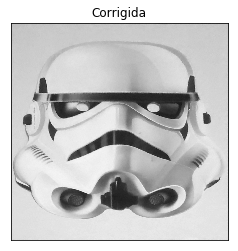

True

In [59]:
plt.imshow(bilinear,cmap = 'gray')
plt.title('Corrigida'), plt.xticks([]), plt.yticks([])
plt.show()
cv2.imwrite('imagem_corrigida.jpeg', bilinear)

# Resultados

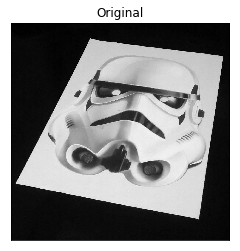

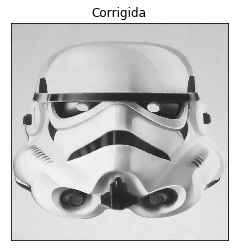

# Análises

Foi possivel obter uma imagem sem distorções projetivas, com uma qualidade tão boa quanto a de um scanner